In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm
import seaborn as sns
import spacy
import nltk
import scipy

from source import helper_functions as hf, cluster_fns
%load_ext autoreload
%autoreload 2
%matplotlib inline

nlp = spacy.load("en")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
tal_df = hf.load_df('total_trans_normalized.csv')

In [56]:
tal_df.head()

,ep_num,ep_title,year,url,act_name,text,tokenized_sents,no_lemma_normalized_sents,normalized_sents,tokenized_text,normalized_tokens,no_lemma_normalized_tokens
0,1,New Beginnings,1995,https://www.thisamericanlife.org/1/transcript,Act Four: Act Four,This is Your Radio Playhouse. I'm Ira Glass. O...,"[[This, is, Your, Radio, Playhouse], [I, 'm, I...","[[radio, playhouse], [m, ira, glass], [ok, rig...","[[radio, playhouse], [be, ira, glass], [okay, ...","[This, is, Your, Radio, Playhouse, I, 'm, Ira,...","[radio, playhouse, be, ira, glass, okay, right...","[radio, playhouse, m, ira, glass, ok, right, r..."
1,1,New Beginnings,1995,https://www.thisamericanlife.org/1/transcript,Act Three: Act Three,"Well, next on our little playhouse stage, we h...","[[Well, next, on, our, little, playhouse, stag...","[[little, playhouse, stage, mr, lawrence, steg...","[[little, playhouse, stage, mr, lawrence, steg...","[Well, next, on, our, little, playhouse, stage...","[little, playhouse, stage, mr, lawrence, stege...","[little, playhouse, stage, mr, lawrence, stege..."
2,1,New Beginnings,1995,https://www.thisamericanlife.org/1/transcript,Act Two: Act Two,"Good morning. Glass, Jacobson & Associates.Hey...","[[Good, morning], [Glass, Jacobson, Associates...","[[good, morning], [glass, jacobson, associates...","[[good, morning], [glass, jacobson, associate]...","[Good, morning, Glass, Jacobson, Associates, H...","[good, morning, glass, jacobson, associate, he...","[good, morning, glass, jacobson, associates, h..."
3,1,New Beginnings,1995,https://www.thisamericanlife.org/1/transcript,Act One: Act One,"All right, Your Radio Playhouse. All right. I'...","[[All, right, Your, Radio, Playhouse], [All, r...","[[right, radio, playhouse], [right], [m, makin...","[[right, radio, playhouse], [right], [be, make...","[All, right, Your, Radio, Playhouse, All, righ...","[right, radio, playhouse, right, be, make, eye...","[right, radio, playhouse, right, m, making, ey..."
4,1,New Beginnings,1995,https://www.thisamericanlife.org/1/transcript,Prologue,"Joe Franklin?I'm ready.It's Ira Glass here.Oh,...","[[Joe, Franklin?I'm, ready], [It, 's, Ira, Gla...","[[joe, franklin?i'm, ready], [ira, glass], [oh...","[[joe, franklin?i'm, ready], [ira, glass], [oh...","[Joe, Franklin?I'm, ready, It, 's, Ira, Glass,...","[joe, franklin?i'm, ready, ira, glass, oh, emc...","[joe, franklin?i'm, ready, ira, glass, oh, emc..."


## Stats by Episode

In [57]:
# num. of acts
tal_df.shape

(3055, 12)

In [58]:
# num. of prologues
tal_df[tal_df['act_name'] == 'Prologue'].shape

(627, 12)

In [59]:
# num. of episodes
by_ep = hf.agg_text(tal_df, 'ep_title', True)
by_ep.shape

(677, 11)

## Stats by Year

In [60]:
# num. of episodes in each year
by_ep.groupby('year')['ep_title'].count()

year
1995     7
1996    39
1997    39
1998    31
1999    30
2000    23
2001    26
2002    25
2003    28
2004    24
2005    25
2006    17
2007    24
2008    25
2009    25
2010    25
2011    30
2012    28
2013    30
2014    29
2015    33
2016    30
2017    28
2018    31
2019    25
Name: ep_title, dtype: int64

In [75]:
by_year = hf.agg_text(tal_df, 'year', False)

In [85]:
nlp.max_length = 2000000

In [88]:
ids_list, corpora_stop, corpora_notstop = make_corpora(by_year)

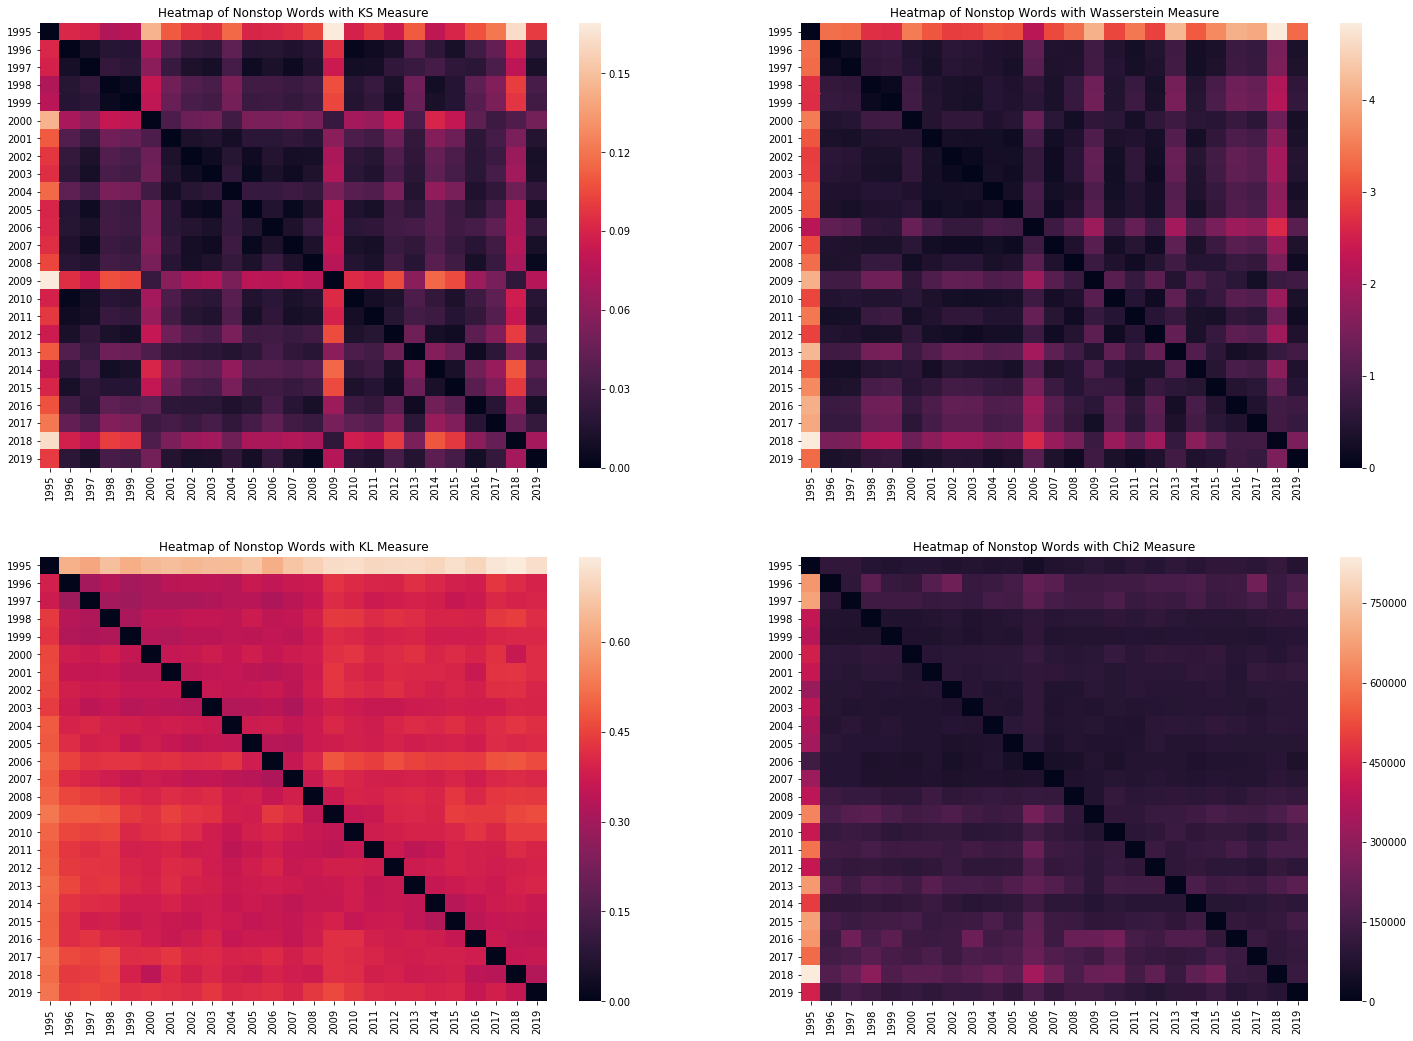

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [97]:
make_div_heatmap(corpora_notstop, ids_list)

Okay, so I am inclined to use Wasserstein/Earth Mover's Distance but I am also going to merge 1995 w/ 1996 b/c it is drowning out the others

In [124]:
nonstop_yrs = []
early_yrs = corpora_notstop[0] + corpora_notstop[1]
nonstop_yrs.append(early_yrs)
nonstop_yrs.extend(corpora_notstop[2:])

In [137]:
ids_list.remove(1995)
ids_list.remove(1996)
ids_list.insert(0, '1995-1996')

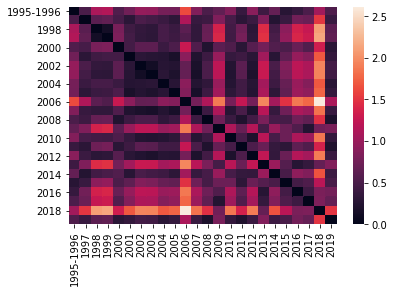

In [143]:
make_one_heatmap(ids_list, nonstop_yrs, 'Wasserstein')

So what stands out to me here: 2006 & 2018 are really NOT similar. Both years are generally more divergent than other years, but are especially different when we compare them together.

Most importantly, this serves as justification from grouping 1995 with 1996 I think: 1995 is not sticking only because it couldn't be close to anything b/c so few eps/words.

## Stats by 5-Year Period

1995-2001 (this one is technically 6 years but so few eps in 1995)
2002-2007
2008-2013
2014-2019

In [152]:
group_1 = list(range(1995, 2002))
group_2 = list(range(2002, 2008))
group_3 = list(range(2008, 2014))
group_4 = list(range(2014, 2020))
yr_groups = [group_1, group_2, group_3, group_4]

In [163]:
tal_df['five_yr_group'] = np.nan
for idx, group in enumerate(yr_groups):
    tal_df.loc[tal_df['year'].isin(group), 'five_yr_group'] = int(idx)

In [178]:
by_ep = hf.split_five_years(by_ep)

In [179]:
# get number of eps per period
by_ep.groupby('five_yr_group')['ep_title'].count()

five_yr_group
0.0    195
1.0    143
2.0    163
3.0    176
Name: ep_title, dtype: int64

In [165]:
by_period = hf.agg_text(tal_df, 'five_yr_group', False)

In [171]:
nlp.max_length = 9500000
ids_list2, corpora_stop2, corpora_notstop2 = make_corpora(by_period, 'tokenized_text', 'five_yr_group')

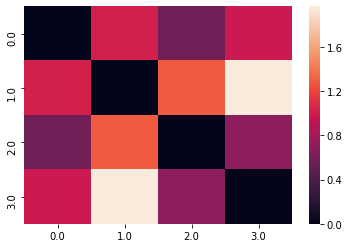

In [172]:
make_one_heatmap(ids_list2, corpora_notstop2, 'Wasserstein')

## Other Stats

In [68]:
# min words per act
min(tal_df['text'].apply(lambda x: len(x)))

141

In [69]:
# max words per act
max(tal_df['text'].apply(lambda x: len(x)))

58270

## Mini-summary
Stats Found:
* Total number of "acts" in dataset (including prologue): 3055
* Total number of prologues (b/c we look at these specificially later): 627
* Total number of eps: 677

In [72]:
# The helper fns from hw4 to get divergences for heatmaps
def kl_divergence(X, Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    D_kl = scipy.stats.entropy(p, q)
    return D_kl

def chi2_divergence(X,Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    return scipy.stats.chisquare(p, q).statistic

def jensen_shannon(X, Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    return scipy.spatial.distance.jensenshannon(p, q)

def Divergence(corpus1, corpus2, difference="KL"):
    """Difference parameter can equal KL, Chi2, or Wass"""
    freqP = nltk.FreqDist(corpus1)
    P = pd.DataFrame(list(freqP.values()), columns = ['frequency'], index = list(freqP.keys()))
    freqQ = nltk.FreqDist(corpus2)
    Q = pd.DataFrame(list(freqQ.values()), columns = ['frequency'], index = list(freqQ.keys()))
    if difference == "KL":
        return kl_divergence(P, Q)
    elif difference == "Chi2":
        return chi2_divergence(P, Q)
    elif difference == "KS":
        try:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency']).statistic
        except:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency'])
    elif difference == "Wasserstein":
        try:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None).statistic
        except:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None)
    elif difference == 'JS':
        return jensen_shannon(P, Q)

In [87]:
def make_corpora(df, token_col='tokenized_text', id_col='year'):
    corpora = []
    corpora_yrs = []
    for index, row in df.iterrows():
        if len(corpora) > 10:
            break
        corpora_yrs.append(row[token_col])

    corpora_s = []
    corpora_nons = []
    for corpus in corpora_yrs:
        s = []
        nons = []
        doc = nlp(' '.join(corpus), disable = ['ner', 'parser'])
        for word in doc:
            if word.is_stop:
                s.append(word.text)
            else:
                nons.append(word.text)
        corpora_s.append(s)
        corpora_nons.append(nons)
    fileids = list(df[id_col])
    return fileids, corpora_s, corpora_nons

In [127]:
def make_div_heatmap(corpora, fileids):
    measure_lst = ['KS', "Wasserstein", "KL", "Chi2"]
    f, axes = plt.subplots(2, 2, figsize=(25, 18))
    for measure, ax in zip(measure_lst, axes.flatten()[:4]):
        ax.set_title(f'Heatmap of Nonstop Words with {measure} Measure')
        L = []
        for p in corpora:
            l = []
            for q in corpora:
                l.append(Divergence(p, q, difference=measure))
            L.append(l)
        M = np.array(L)
        fig = plt.figure()
        div = pd.DataFrame(M, columns=fileids, index=fileids)
        g = sns.heatmap(div, ax=ax)
        plt.setp(g.get_xticklabels(), rotation=90)
    plt.show()

In [142]:
def make_one_heatmap(fileids, corpora, measure):
    L = []
    for p in corpora:
        l = []
        for q in corpora:
            l.append(Divergence(p,q, difference=measure))
        L.append(l)
    M = np.array(L)
    fig = plt.figure()
    div = pd.DataFrame(M, columns=fileids, index=fileids)
    ax = sns.heatmap(div)
    plt.show()